# **Data Import & Cleaning**

In [70]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Import dataset
df = pd.read_csv("/content/Sample_-_Superstore[1].csv", encoding='latin-1')

In [72]:
# Remove unwanted columns
df.drop(['Row ID','Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Product ID'],axis=1,inplace=True)

In [43]:
df.head(10)

,Order ID,Order Date,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,CA-2014-115812,6/9/2014,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,CA-2014-115812,6/9/2014,West,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,CA-2014-115812,6/9/2014,West,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,CA-2014-115812,6/9/2014,West,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,CA-2014-115812,6/9/2014,West,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Region        9994 non-null   object 
 3   Category      9994 non-null   object 
 4   Sub-Category  9994 non-null   object 
 5   Product Name  9994 non-null   object 
 6   Sales         9994 non-null   float64
 7   Quantity      9994 non-null   int64  
 8   Discount      9994 non-null   float64
 9   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 780.9+ KB


In [45]:
# Check for missing values & remove if any
df.isna().sum()

,0
Order ID,0
Order Date,0
Region,0
Category,0
Sub-Category,0
Product Name,0
Sales,0
Quantity,0
Discount,0
Profit,0


In [73]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df

,Order ID,Order Date,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2017-02-26,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2017-02-26,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2017-02-26,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [74]:
#Check for duplicates
df.duplicated().sum()

np.int64(1)

In [48]:
#Removing duplicates
df.drop_duplicates(inplace=True)

# Descriptive Analysis

In [49]:
Total_sales=df['Sales'].sum()
print("Total sales:", Total_sales)

Total sales: 2296919.4883000003


In [50]:
Total_profit=df['Profit'].sum()
print("Total profit:", Total_profit)

Total profit: 286409.0805


In [51]:
Total_orders=df['Order ID'].nunique()
print("Total orders:", Total_orders)

Total orders: 5009


In [52]:
avg_order_values=df.groupby('Order ID')['Sales'].sum().mean()
print("Average order values:", avg_order_values)

Average order values: 458.55849237372735


In [53]:
sales_region=df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_region

,Sales
Region,
West,725457.8245
East,678499.8680
Central,501239.8908
South,391721.9050


In [54]:
category_sales=df.groupby('Category')['Sales'].sum().sort_values()
category_sales

,Sales
Category,
Office Supplies,719047.0320
Furniture,741718.4233
Technology,836154.0330


In [55]:
region_sales=df.groupby('Sub-Category')['Sales'].sum().sort_values()
region_sales


,Sales
Sub-Category,
Fasteners,3024.2800
Labels,12486.3120
Envelopes,16476.4020
Art,27118.7920
Supplies,46673.5380
Paper,78479.2060
Furnishings,91705.1640
Appliances,107532.1610
Bookcases,114879.9963


In [56]:
Profit_Margin=(Total_profit/Total_sales)*100
print("Profit Margin:",Profit_Margin)

Profit Margin: 12.469269469779174


# Trend Analysis

In [57]:
monthly_sales=df.groupby(df['Order Date'].dt.month)['Sales'].sum()
monthly_sales

,Sales
Order Date,
1,94924.8356
2,59751.2514
3,205005.4888
4,137480.7566
5,155028.8117
6,152718.6793
7,147238.0970
8,159044.0630
9,307649.9457


In [58]:
yearly_sales=df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales

,Sales
Order Date,
2014,483966.1261
2015,470532.5090
2016,609205.5980
2017,733215.2552


# **Regional & Product Insights**

In [79]:
# Top 10 Products by Sales
top_10_products=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_10_products

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [60]:
region_highest_profit=df.groupby('Region')['Profit'].sum().sort_values(ascending=False).head(1)
region_lowest_profit=df.groupby('Region')['Profit'].sum().sort_values().head(1)

print("Highest profit region:",region_highest_profit)
print("Highest profit region:",region_lowest_profit)

Highest profit region: Region
West    108418.4489
Name: Profit, dtype: float64
Highest profit region: Region
Central    39706.3625
Name: Profit, dtype: float64


In [61]:
df['profit margins']=(df['Profit']/df['Sales'])*100
profit_margin_sales=df.groupby('Category')['profit margins'].mean().sort_values(ascending=False)
profit_margin_sales

,profit margins
Category,
Technology,15.613805
Office Supplies,13.803029
Furniture,3.882204


# **Visualization**

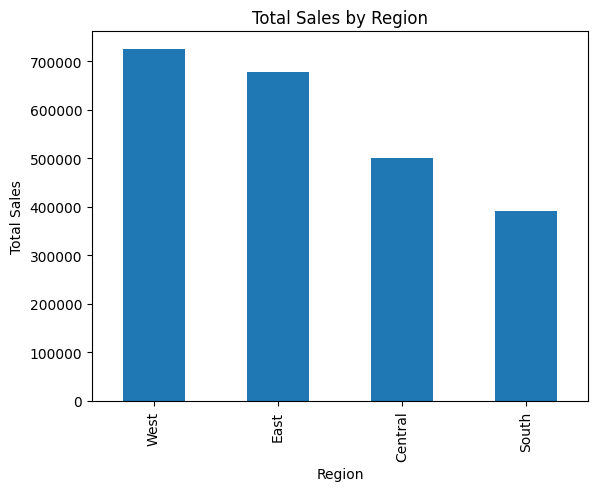

In [63]:
# Sales by region
sales_region.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

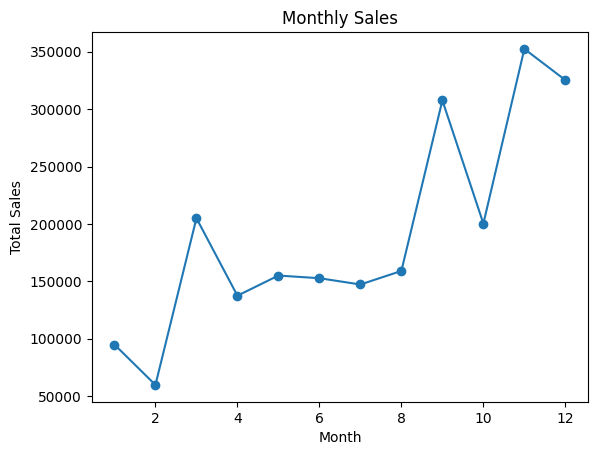

In [64]:
# Monthly Sales Trend
monthly_sales.plot(kind="line",marker="o")
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

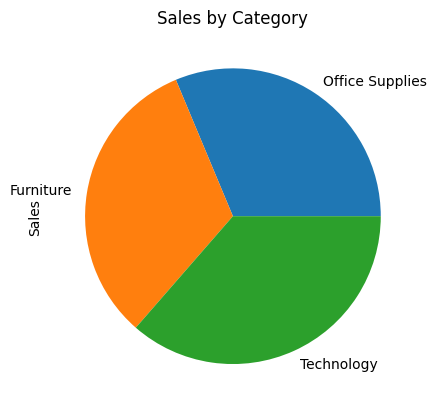

In [66]:
# Sales by category
category_sales.plot(kind="pie")
plt.title('Sales by Category')
plt.show()

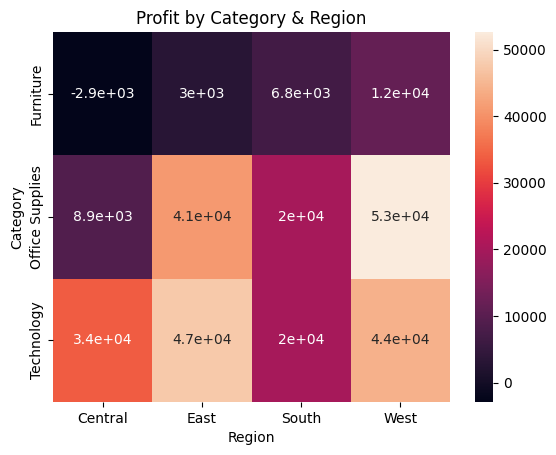

In [78]:
# Profit by Category & Region (Heatmap)
profit_pivot = df.pivot_table(values="Profit", index="Category", columns="Region", aggfunc="sum")
sns.heatmap(profit_pivot, annot=True)
plt.title("Profit by Category & Region")
plt.show()
